In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

#https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63
#https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series

In [2]:
df = pd.read_csv("data/trip.csv",error_bad_lines=False,usecols=['trip_id','starttime','stoptime',
                                                                'bikeid','tripduration','from_station_name',
                                                               'to_station_name','from_station_id','to_station_id','usertype'])
df = df.drop_duplicates()

In [3]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [4]:
df.shape

(236066, 10)

In [5]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member


In [6]:
df.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
dtype: object

In [7]:
time_series = df[['trip_id']].groupby(df.starttime.dt.date).count()

<AxesSubplot:xlabel='starttime'>

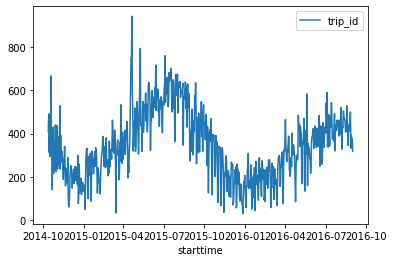

In [8]:
sns.lineplot(data=time_series)

In [9]:
time_series.rename(columns={"trip_id":"nb_trips"},inplace=True)

In [10]:
time_series['time']= np.arange(len(time_series.index))
time_series['lag'] = time_series['nb_trips'].shift(1)

In [11]:
time_series

,nb_trips,time,lag
starttime,,,
2014-10-13,409,0,NaN
2014-10-14,491,1,409.0
2014-10-15,313,2,491.0
2014-10-16,395,3,313.0
2014-10-17,294,4,395.0
...,...,...,...
2016-08-27,333,684,500.0
2016-08-28,392,685,333.0
2016-08-29,369,686,392.0


In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
df_weather = pd.read_csv("data/weather.csv")

In [16]:
df_weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [21]:
df_weather.columns

Index(['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In',
       'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Events'],
      dtype='object')

In [23]:
df_weather["Events"].unique()

array(['Rain', nan, 'Rain , Snow', 'Fog', 'Fog , Rain',
       'Rain , Thunderstorm', 'Fog-Rain', 'Snow', 'Rain-Thunderstorm',
       'Rain-Snow'], dtype=object)